In [4]:
import pandas

from pyhdf.HDF import HDF, HC
from pyhdf.VS  import VS

filename = 'magswe_data_64sec_2289.hdf'
file_ms = HDF(filename, HC.READ)
vs = file_ms.vstart()

# data_info_list = vs.vdatainfo()
vdata_magswe = vs.attach('MAGSWE_data_64sec')
nrecs, intmode, fields, size, name = vdata_magswe.inquire()

magswe = pandas.DataFrame(data=vdata_magswe[:], columns=fields)

vs.end()
file_ms.close()

In [5]:
import datetime

def parse_year_doy(year, doy, hour, minute, second):
    dt = datetime.datetime(int(year), 1, 1)
    td = datetime.timedelta(days=int(doy) - 1, hours=int(hour), minutes=int(minute), seconds=int(second))
    return dt + td

datetime_data = magswe[['year', 'day', 'hr', 'min', 'sec']]
magswe.index = [parse_year_doy(y, d, h, m, s) for (y, d, h, m, s) in datetime_data.values]
print(magswe)

                     year  day  hr  min        sec      fp_year      fp_doy  \
2001-03-29 00:00:52  2001   88   0    0  52.012798  2001.238358   88.000602   
2001-03-29 00:01:56  2001   88   0    1  56.035198  2001.238360   88.001343   
2001-03-29 00:03:00  2001   88   0    3   0.057600  2001.238362   88.002084   
2001-03-29 00:04:03  2001   88   0    4   3.993600  2001.238364   88.002824   
2001-03-29 00:05:08  2001   88   0    5   8.016000  2001.238366   88.003565   
...                   ...  ...  ..  ...        ...          ...         ...   
2001-04-24 23:55:28  2001  114  23   55  28.012800  2001.312320  114.996852   
2001-04-24 23:56:32  2001  114  23   56  32.035198  2001.312322  114.997593   
2001-04-24 23:57:36  2001  114  23   57  36.057598  2001.312324  114.998334   
2001-04-24 23:58:39  2001  114  23   58  39.993599  2001.312326  114.999074   
2001-04-24 23:59:44  2001  114  23   59  44.015999  2001.312328  114.999815   

                         ACEepoch           Np     

In [6]:
final_magswe = magswe[['Np', 'Vp', 'B_gsm_x', 'B_gsm_y', 'B_gsm_z', 'Bmag']]
print(final_magswe.head())
final_magswe.to_csv('magswe.csv')

                        Np           Vp   B_gsm_x   B_gsm_y   B_gsm_z    Bmag
2001-03-29 00:00:52  3.331 -9999.900391 -1.296167  1.820508 -2.194268  3.1367
2001-03-29 00:01:56  3.179   568.599976 -1.120196  1.486046 -2.449913  3.0817
2001-03-29 00:03:00  3.602   564.669983 -1.331259  1.927612 -2.175092  3.2015
2001-03-29 00:04:03  4.065   566.570007 -1.417159  1.980535 -2.007022  3.1581
2001-03-29 00:05:08  3.446   565.030029 -1.458881  1.928969 -1.949578  3.1100


In [7]:
def parse_year_doy(year, doy, hour):
    return datetime.datetime(int(year), 1, 1) + datetime.timedelta(days=int(doy) - 1, hours=int(hour))

filename = '/Users/rugi/Documents/Earth Observation and Space Weather/Space Weather Events/X14.4/omni2_data.lst.txt'

omni_data = pandas.read_csv(filename, sep='\s+',
                            names=['year', 'doy', 'hour', 'Bt','Bz', 'Np', 'Vp', 'Kp*10', 'Dst', 'F10.7', 'AE', '>10MeV', '>30MeV', '>60MeV'],
                            parse_dates={'date':['year', 'doy', 'hour']},
                            date_parser=parse_year_doy,
                            index_col='date',                           
                            na_values=999.9)

print(omni_data.head())

                      Bt   Bz   Np     Vp  Kp*10  Dst  F10.7   AE  >10MeV  \
date                                                                        
2001-04-10 00:00:00  4.7 -0.8  0.7  564.0     33  -52  170.4  206   144.0   
2001-04-10 01:00:00  4.4 -1.5  0.8  573.0     33  -50  170.4  388   173.0   
2001-04-10 02:00:00  4.4 -0.6  0.7  548.0     33  -46  170.4  262   161.0   
2001-04-10 03:00:00  4.4  0.0  0.7  547.0     17  -43  170.4   59   150.0   
2001-04-10 04:00:00  4.5  1.1  0.7  557.0     17  -42  170.4   42   152.0   

                     >30MeV  >60MeV  
date                                 
2001-04-10 00:00:00    33.0    9.72  
2001-04-10 01:00:00    37.2   10.10  
2001-04-10 02:00:00    34.6    9.59  
2001-04-10 03:00:00    32.4    9.08  
2001-04-10 04:00:00    31.8    8.94  


/Users/rugi/opt/anaconda3/envs/hs_nb_env/lib/python3.7/site-packages/pandas/io/parsers/base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


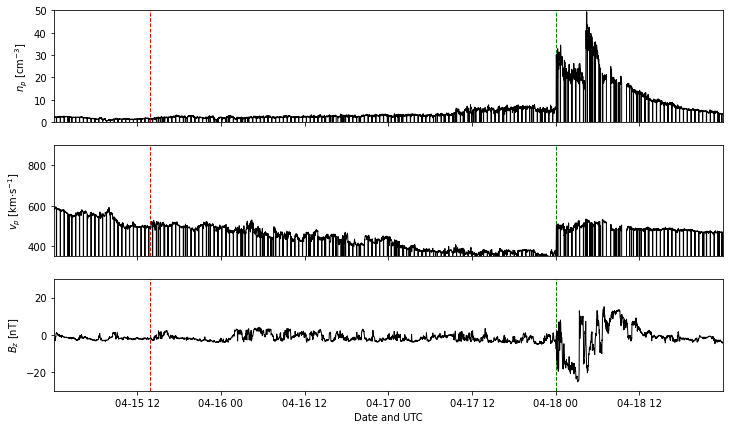

In [8]:
from matplotlib import pyplot

fig, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=[12, 7], sharex='all')

event_data = final_magswe['2001-04-15':'2001-04-18']

for ax in (ax1, ax2, ax3):
    ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
    ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax1.plot(event_data['Np'], 'k-', linewidth=1)
ax2.plot(event_data['Vp'], 'k-', linewidth=1)
ax3.plot(event_data['B_gsm_z'], 'k-', linewidth=1)

ax.set_xlabel('Date and UTC')
ax1.set_ylabel('$n_p$ [cm$^{-3}$]')
ax2.set_ylabel('$v_p$ [km$\\cdot$s$^{-1}$]')
ax3.set_ylabel('$B_z$ [nT]')

ax1.set_xlim(event_data.index[0], event_data.index[-1])
ax1.set_ylim([0, 50])
ax2.set_ylim([350, 900])
ax3.set_ylim([-30, 30])

pyplot.show()

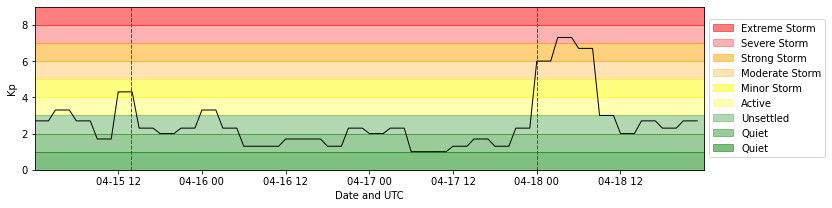

In [17]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Kp*10']['2001-04-15':'2001-04-18'] *.1

ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 8, 9, color='red', alpha=.5, label = 'Extreme Storm')
ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 7, 8, color='red', alpha=.3, label = 'Severe Storm')
ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 6, 7, color='orange', alpha=.5, label = 'Strong Storm')

ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 5, 6, color='orange', alpha=.3, label = 'Moderate Storm')
ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 4, 5, color='yellow', alpha=.5, label = 'Minor Storm')
ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 3, 4, color='yellow', alpha=.3, label = 'Active')

ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 2, 3, color='green', alpha=.3, label = 'Unsettled')
ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 1, 2, color='green', alpha=.4, label = 'Quiet')
ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 0, 1, color='green', alpha=.5, label = 'Quiet')

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('Kp')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
ax.set_ylim([0, 9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

pyplot.show()

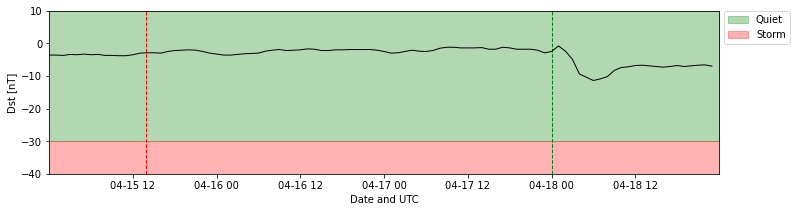

In [18]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Dst']['2001-04-15':'2001-04-18'] *.1

ax.fill_between(pandas.to_datetime(['2001-04-15','2001-04-19']), 10, -30, color='green', alpha=.3, label = 'Quiet')
#ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 4, 5, color='yellow', alpha=.3)
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-19']), -30, -40, color='red', alpha=.3, label = 'Storm')

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('Dst [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
ax.set_ylim([-40, 10])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

pyplot.show()

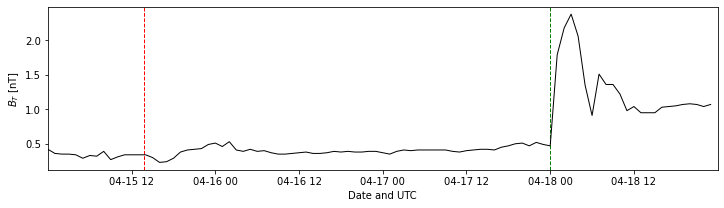

In [19]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Bt']['2001-04-15':'2001-04-18'] *.1

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$B_T$ [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])

pyplot.show()

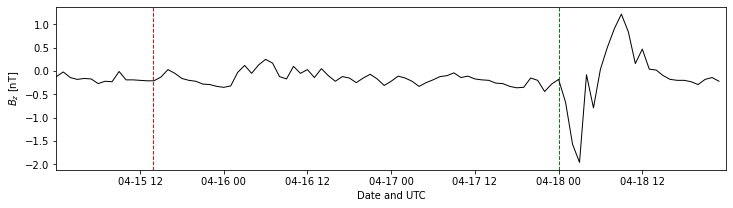

In [20]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Bz']['2001-04-15':'2001-04-18'] *.1

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$B_z$ [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])

pyplot.show()

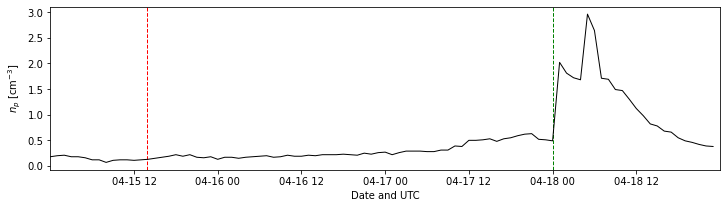

In [21]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Np']['2001-04-15':'2001-04-18'] *.1

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$n_p$ [cm$^{-3}$]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])

pyplot.show()

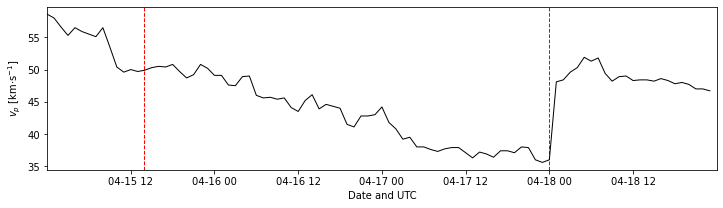

In [22]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Vp']['2001-04-15':'2001-04-18'] *.1

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$v_p$ [km$\\cdot$s$^{-1}$]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([300, 800])

pyplot.show()

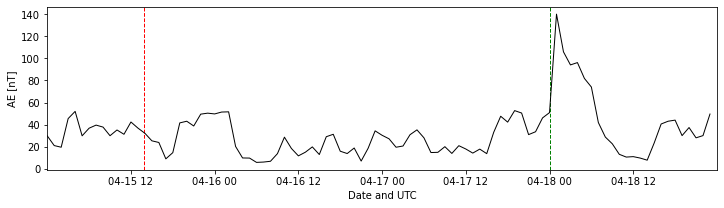

In [23]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['AE']['2001-04-15':'2001-04-18'] *.1

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('AE [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])

pyplot.show()

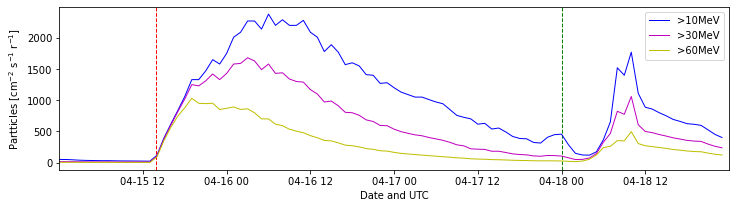

In [24]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_10MeV = omni_data['>10MeV']['2001-04-15':'2001-04-18']#*.1
event_30MeV = omni_data['>30MeV']['2001-04-15':'2001-04-18']#*.1
event_60MeV = omni_data['>60MeV']['2001-04-15':'2001-04-18']#*.1

ax.axvline(pandas.to_datetime('2001-04-15 13:50'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-18 00:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_10MeV, 'k-', linewidth=1, color= 'b', label='>10MeV')
ax.plot(event_30MeV, 'k-', linewidth=1, color= 'm', label='>30MeV')
ax.plot(event_60MeV, 'k-', linewidth=1, color= 'y', label='>60MeV')


ax.set_ylabel('Partticles [cm$^{-2}$ s$^{-1}$ r$^{-1}$] ')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])
ax.legend()

pyplot.show()